# MVC project: Get the Data
- [GitHub](https://github.com/romainmartinez/mvc)

## 0. Setup

In [1]:
# Common imports
import pandas as pd
import numpy as np
import os

# the 'mvc' directory contains functions used but not necessary to understand the story
import mvc

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_context("paper")

# to make this notebook's output stable across runs
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 1. Get the Data

In [2]:
DATA_PATH = '/media/romain/E/Projet_MVC/data/Final_output'
DATA_FORMAT = 'only_max'  # could be either 'only_max', '3000_points' or '100_points'

In [3]:
mat = mvc.fileio.ImportMat(DATA_PATH, DATA_FORMAT, export='dict', normalize=True)

data format: only_max
project 'Landry2012_only_max' loaded (18 participants)
project 'Landry2013_only_max' loaded (21 participants)
project 'Patrick_2013_only_max' loaded (16 participants)
project 'Violon_only_max' loaded (10 participants)
project 'Sylvain_2015_only_max' loaded (10 participants)
project 'Landry2015_2_only_max' loaded (11 participants)
project 'Tennis_only_max' loaded (16 participants)
project 'Landry2016_only_max' loaded (15 participants)
project 'Landry2015_1_only_max' loaded (14 participants)
project 'Yoann_2015_only_max' loaded (22 participants)
	sample shape: (18, 12, 16)
	total participants: 152


/home/romain/Documents/codes/mvc/mvc/fileio.py:53: RuntimeWarning: All-NaN slice encountered
  max_mvc = np.nanmax(mat[dataset_name][iparticipant, imuscle, :])


In [4]:
# Variables names
DATASETS_NAMES = mat.datasets
MUSCLES_NAMES = ['upper trapezius', 'middle trapezius', 'lower trapezius', # 0, 1, 2
           'anterior deltoid', 'middle deltoid', 'posterior deltoid',      # 3, 4, 5
           'pectoralis major', 'serratus anterior', 'latissimus dorsi',    # 6, 7, 8
           'supraspinatus', 'infraspinatus', 'subscapularis']              # 9, 10, 11
COLUMNS_NAMES = ['datasets', 'participants', 'muscles', 'tests', 'mvc']
N_TEST = 16

In [5]:
# dict to single dataframe
df_tidy = pd.DataFrame({
    'participant': mat.data['participants'],
    'dataset': mat.data['datasets'],
    'muscle': mat.data['muscles'],
    'test': mat.data['tests'],
    'mvc': mat.data['mvc'],
}).dropna().astype(int)

df_tidy.head()

,dataset,muscle,mvc,participant,test
0,0,0,43,0,0
1,0,0,62,0,1
2,0,0,57,0,2
3,0,0,78,0,3
4,0,0,100,0,4


## 2. Prepare the Data for Machine Learning

In [6]:
# convert from tidy to wide dataframe
df_wide = df_tidy.pivot_table(index=['dataset', 'participant', 'muscle'], columns='test', values='mvc',
                              fill_value=0).reset_index()

In [7]:
# drop useless features
df_wide = df_wide.drop(['dataset', 'participant'], axis=1)

In [8]:
# get new features
df_wide['max'] = df_wide[df_wide.columns[1:]].max(axis=1)   # row max value
df_wide['best_test'] = df_wide.idxmax(axis=1)               # test which contains the max

In [9]:
print(f'DataFrame shape: {df_wide.shape}')
df_wide.head()

DataFrame shape: (1468, 19)


test,muscle,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,max,best_test
0,0,43,62,57,78,100,23,13,11,0,0,0,0,0,0,0,0,100,4
1,1,8,100,96,31,46,34,30,12,0,0,0,0,0,0,0,0,100,1
2,2,8,68,100,56,63,23,46,5,0,0,0,0,0,0,0,0,100,2
3,3,5,23,39,100,82,2,3,11,0,0,0,0,0,0,0,0,100,3
4,4,16,85,100,50,71,20,5,6,0,0,0,0,0,0,0,0,100,2


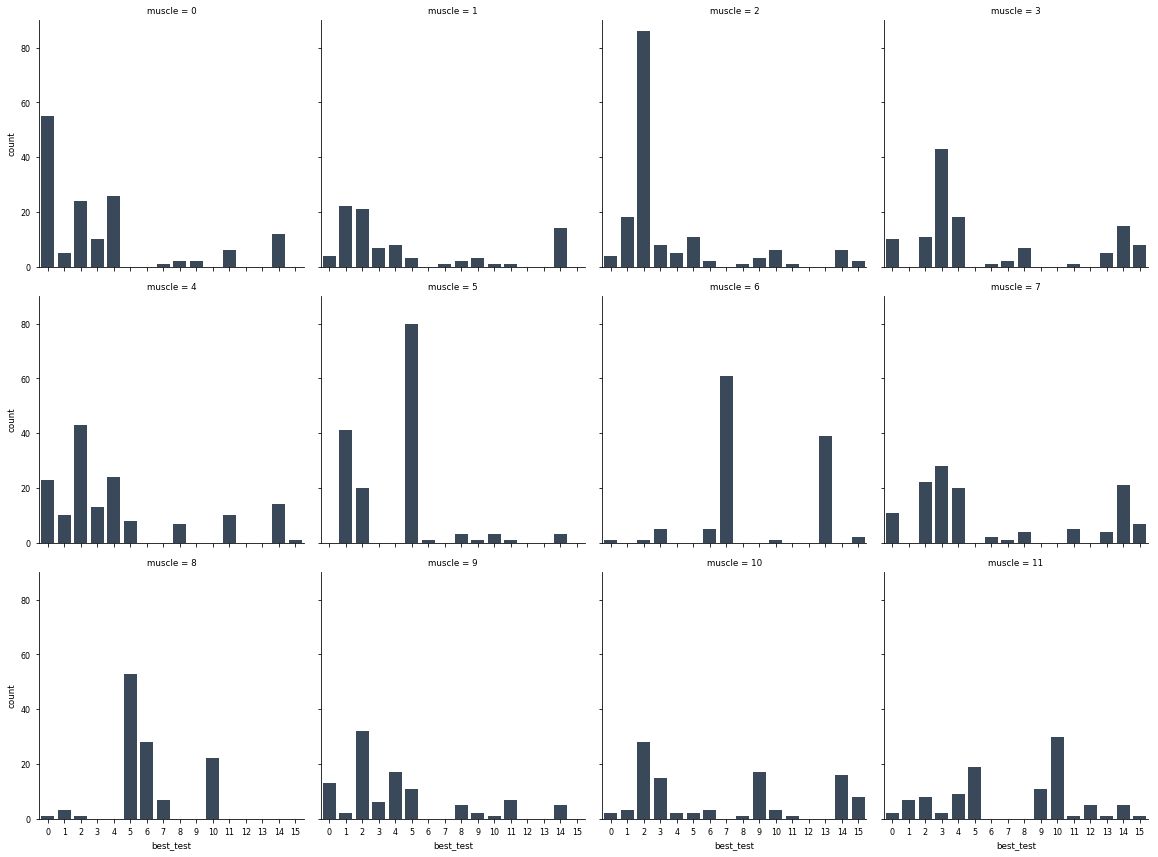

In [10]:
sns.factorplot(x='best_test', col='muscle',
               data=df_wide, kind='count',
               col_wrap=4, color='#34495e')
plt.show()

## 3. Save Data

In [15]:
df_wide.to_hdf('mvc.h5', 'MVC', format='table')

### Stratified Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(df_clean, test_size=0.2, random_state=RANDOM_SEED,
                                       stratify=df_wide['muscle'])

NameError: name 'df_clean' is not defined

In [62]:
test = df_wide.drop(['best_test', 'max'], axis=1)